# 06. 화소 영역처리

> 화소 영역 처리
- 화소 점처리: 화소 값반 변경하는 것
- 화소 영역처리: 점과 그 주위의 화소 값도 함께 고려하는 공간 영역 역산
- 회선 마스크 = 회선 필터 = 회선 처리 = 컨볼루션 

> 회선 마스크
- 내 값을 결정할 대 주변의 픽셀의 평균을 사용하겠다
- 1/9 (I1+I2 + I3 + ...) : 평균의 의미
- 만약 data = 7,3,1,2 일 때 회선 마스크를 0.25,0.25,0.25,0.25 -> 평균을 주겠다
- 만약  data = 7,3일 때 회선 마스크를 1, -1이라면 => 7 * 1 + -1 * 3 => 미분의 의미 
- 회선 마스크를 어떻게 생성하느냐에 따라 값을 변화할 수 있음.
- 회선마스크의 합이 1 -> 원본 영상을 그대로 유지하게 됨.(가중치의 합이 1인 경우)
- 합이 1이 아니면 원본영상 유지 x. 
- -값을 사용: 차이를 본다는 의미


> 미분
- 같이 급격하게 변한하는 구간만 미분값이 0이 아님
- 갑이 비슷한 곳은 미분값이 0인 특성을 이용해서 경계선 검출
- https://kylog.tistory.com/24


> 평균
- 스무딩한 방법
- 블러링의 의미
- 내 값이 평균보다 작으면 올라가고, 평균보다 크면 작아짐.
- 회선마스크가 클수록 계속 값의 성질이 줄어듦.평균화되지만, 더 많으면 연산량이 많아짐.
- 사람이 많을수록 비슷한 사람들의 군집이 됨. 평균화 됨.


> 종류
1. 엠보싱
2. 블러링
3. 샤프닝
4. 경계선 검출

## 가우시안 스무딩 
> 효과
- 잡음 제거
- 

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### 1. 평균을 이용한 bluring

In [17]:
k = 11
kernel = np.ones((k,k), np.float32)/(k*k)


In [18]:
filtered = cv2.filter2D(src = img,
                        ddepth =-1, 
                        kernel = kernel)

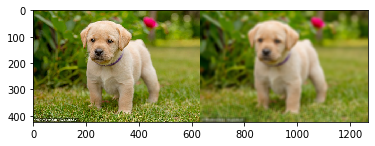

In [19]:
plt.imshow(np.hstack([img,filtered]))

### 2. 자기 자신을 이용한 커널

In [22]:
kernel= np.array([[0,0,0],
                 [0,1,0],
                 [0,0,0]], dtype = np.float32)

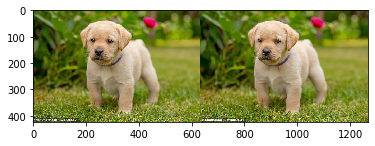

In [23]:
filtered = cv2.filter2D(src = img,
                        ddepth =-1, 
                        kernel = kernel)

plt.imshow(np.hstack([img,filtered]))

### 3. sharp을 이용한 커널

In [24]:
kernel= np.array([[-1,-1,-1],
                 [-1,8,-1],
                 [-1,-1,-1]], dtype = np.float32)

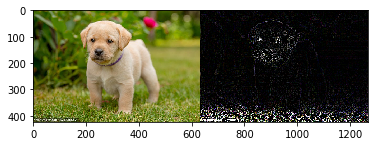

In [25]:
filtered = cv2.filter2D(src = img,
                        ddepth =-1, 
                        kernel = kernel)

plt.imshow(np.hstack([img,filtered]))

### 4. sharp을 이용한 커널

In [35]:
kernel= np.array([[0,-1,0],
                 [-1,-5,-1],
                 [0,-1,0]], dtype = np.float32)

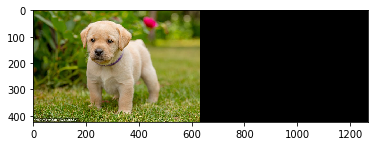

In [36]:
filtered = cv2.filter2D(src = img,
                        ddepth =-1, 
                        kernel = kernel)

plt.imshow(np.hstack([img,filtered]))

### 5. 좌우 차의 변화량을 보는 커널(수직 엣지 찾기)

In [28]:
kernel= np.array([[1,0,-1],
                 [1,0,-1],
                 [1,0,-1]], dtype = np.float32)

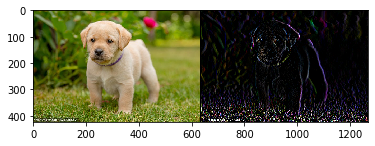

In [29]:
filtered = cv2.filter2D(src = img,
                        ddepth =-1, 
                        kernel = kernel)

plt.imshow(np.hstack([img,filtered]))

### 6.상하 차의 변화량을 보는 커널(수평 엣지 찾기)

In [30]:
kernel= np.array([[1,1,1],
                 [0,0,0],
                 [-1,-1,-1]], dtype = np.float32)

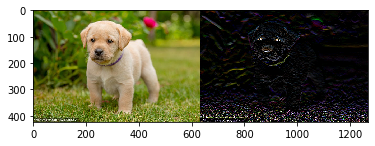

In [31]:
filtered = cv2.filter2D(src = img,
                        ddepth =-1, 
                        kernel = kernel)

plt.imshow(np.hstack([img,filtered]))